<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.190486,60.464039,55.603696,-0.000223,153.257998,153.258043,-0.000044
1,0.0,1.0,36.066519,71.672608,48.035936,0.000489,165.775552,165.774938,0.000614
2,0.0,2.0,82.851193,52.795958,81.033404,0.001354,226.681908,226.680644,0.001264
3,0.0,3.0,94.282347,83.674593,39.114794,-0.000249,227.071485,227.071812,-0.000326
4,0.0,4.0,82.335990,70.050129,97.406860,-0.000100,259.792879,259.793268,-0.000389
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.886188,93.861736,60.925500,-0.000119,222.673306,222.672978,0.000327
29996,999.0,26.0,83.776005,21.507699,74.550592,0.003337,189.837634,189.835340,0.002294
29997,999.0,27.0,46.886831,79.512202,55.858175,-0.000309,192.256900,192.257052,-0.000153
29998,999.0,28.0,33.001982,67.525134,82.700787,0.000002,193.227906,193.227699,0.000207


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.190486,60.464039,55.603696,-0.000223,153.257998,153.258043,-0.000044
1,0.0,1.0,36.066519,71.672608,48.035936,0.000489,165.775552,165.774938,0.000614
2,0.0,2.0,82.851193,52.795958,81.033404,0.001354,226.681908,226.680644,0.001264
3,0.0,3.0,94.282347,83.674593,39.114794,-0.000249,227.071485,227.071812,-0.000326
4,0.0,4.0,82.335990,70.050129,97.406860,-0.000100,259.792879,259.793268,-0.000389
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.886188,93.861736,60.925500,-0.000119,222.673306,222.672978,0.000327
29996,999.0,26.0,83.776005,21.507699,74.550592,0.003337,189.837634,189.835340,0.002294
29997,999.0,27.0,46.886831,79.512202,55.858175,-0.000309,192.256900,192.257052,-0.000153
29998,999.0,28.0,33.001982,67.525134,82.700787,0.000002,193.227906,193.227699,0.000207


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    27.190486  60.464039  55.603696 -0.000223  153.257998   
      1.0    36.066519  71.672608  48.035936  0.000489  165.775552   
      2.0    82.851193  52.795958  81.033404  0.001354  226.681908   
      3.0    94.282347  83.674593  39.114794 -0.000249  227.071485   
      4.0    82.335990  70.050129  97.406860 -0.000100  259.792879   
...                ...        ...        ...       ...         ...   
999.0 25.0   57.886188  93.861736  60.925500 -0.000119  222.673306   
      26.0   83.776005  21.507699  74.550592  0.003337  189.837634   
      27.0   46.886831  79.512202  55.858175 -0.000309  192.256900   
      28.0   33.001982  67.525134  82.700787  0.000002  193.227906   
      29.0   94.573618  81.225661  26.595925  0.000425  212.395629   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.258043 -0.000044  
      1.0    165.774938  0.000614  
      2.0    226.680644  0.001264  
      3.0    227.071812 -0.000326  
      4.0    259.793268 -0.000389  
...                 ...       ...  
999.0 25.0   222.672978  0.000327  
      26.0   189.835340  0.002294  
      27.0   192.257052 -0.000153  
      28.0   193.227699  0.000207  
      29.0   212.395481  0.000148  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    27.190486  60.464039  55.603696 -0.000223  153.257998   
      1.0    36.066519  71.672608  48.035936  0.000489  165.775552   
      2.0    82.851193  52.795958  81.033404  0.001354  226.681908   
      3.0    94.282347  83.674593  39.114794 -0.000249  227.071485   
      4.0    82.335990  70.050129  97.406860 -0.000100  259.792879   
...                ...        ...        ...       ...         ...   
999.0 25.0   57.886188  93.861736  60.925500 -0.000119  222.673306   
      26.0   83.776005  21.507699  74.550592  0.003337  189.837634   
      27.0   46.886831  79.512202  55.858175 -0.000309  192.256900   
      28.0   33.001982  67.525134  82.700787  0.000002  193.227906   
      29.0   94.573618  81.225661  26.595925  0.000425  212.395629   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.258043 -0.000044  
      1.0    165.774938  0.000614  
      2.0    226.680644  0.001264  
      3.0    227.071812 -0.000326  
      4.0    259.793268 -0.000389  
...                 ...       ...  
999.0 25.0   222.672978  0.000327  
      26.0   189.835340  0.002294  
      27.0   192.257052 -0.000153  
      28.0   193.227699  0.000207  
      29.0   212.395481  0.000148  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.190486,60.464039,55.603696,-0.000223,153.257998,153.258043,-0.000044
1,0.0,1.0,36.066519,71.672608,48.035936,0.000489,165.775552,165.774938,0.000614
2,0.0,2.0,82.851193,52.795958,81.033404,0.001354,226.681908,226.680644,0.001264
3,0.0,3.0,94.282347,83.674593,39.114794,-0.000249,227.071485,227.071812,-0.000326
4,0.0,4.0,82.335990,70.050129,97.406860,-0.000100,259.792879,259.793268,-0.000389
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.886188,93.861736,60.925500,-0.000119,222.673306,222.672978,0.000327
29996,999.0,26.0,83.776005,21.507699,74.550592,0.003337,189.837634,189.835340,0.002294
29997,999.0,27.0,46.886831,79.512202,55.858175,-0.000309,192.256900,192.257052,-0.000153
29998,999.0,28.0,33.001982,67.525134,82.700787,0.000002,193.227906,193.227699,0.000207


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    27.190486  60.464039  55.603696 -0.000223  153.257998   
      1.0    36.066519  71.672608  48.035936  0.000489  165.775552   
      2.0    82.851193  52.795958  81.033404  0.001354  226.681908   
      3.0    94.282347  83.674593  39.114794 -0.000249  227.071485   
      4.0    82.335990  70.050129  97.406860 -0.000100  259.792879   
...                ...        ...        ...       ...         ...   
999.0 25.0   57.886188  93.861736  60.925500 -0.000119  222.673306   
      26.0   83.776005  21.507699  74.550592  0.003337  189.837634   
      27.0   46.886831  79.512202  55.858175 -0.000309  192.256900   
      28.0   33.001982  67.525134  82.700787  0.000002  193.227906   
      29.0   94.573618  81.225661  26.595925  0.000425  212.395629   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.258043 -0.000044  
      1.0    165.774938  0.000614  
      2.0    226.680644  0.001264  
      3.0    227.071812 -0.000326  
      4.0    259.793268 -0.000389  
...                 ...       ...  
999.0 25.0   222.672978  0.000327  
      26.0   189.835340  0.002294  
      27.0   192.257052 -0.000153  
      28.0   193.227699  0.000207  
      29.0   212.395481  0.000148  

[30000 rows x 7 columns]

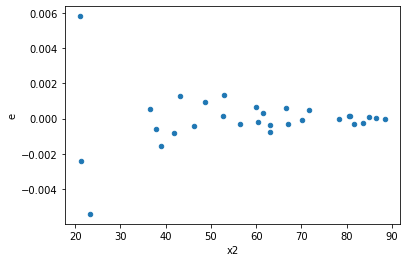

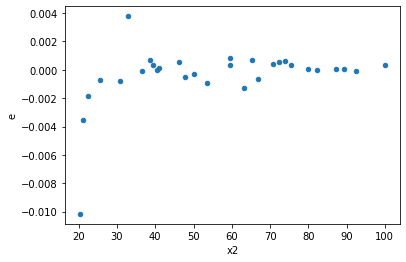

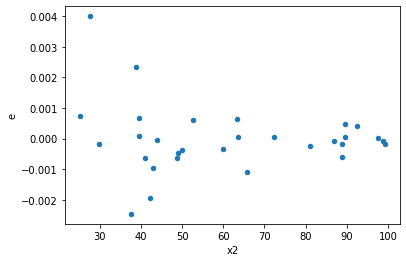

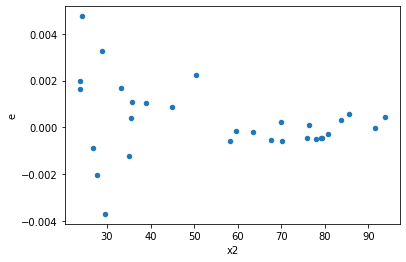

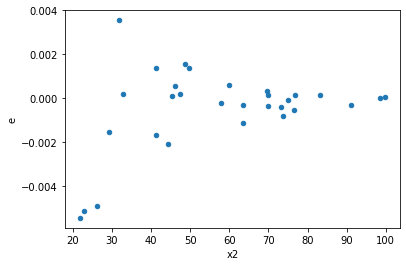

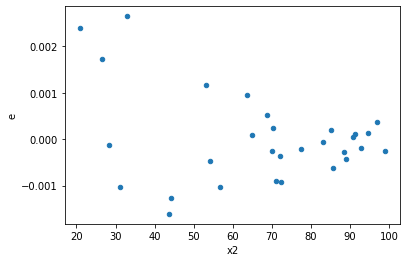

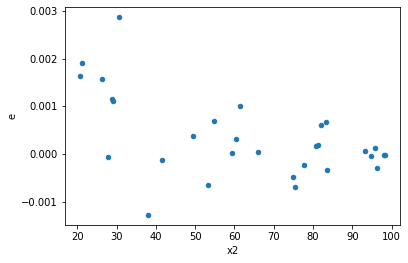

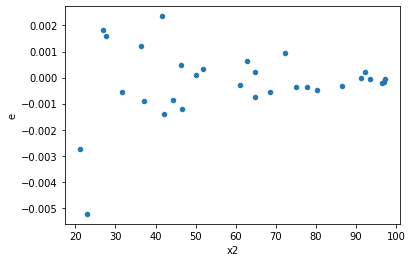

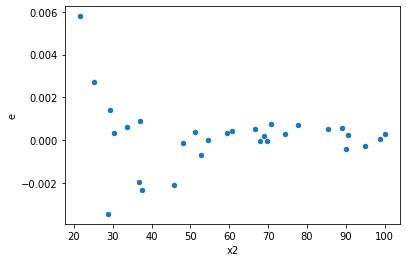

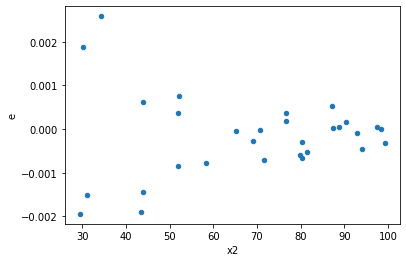

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
12.0,9.0,9.0,1.5149737632607252e-05,3.7389836908811354e-05,1.683304181400806e-06,4.154426323201261e-06,2.4680187746839946,0.19454252633657432,0.9027287368317128,0.09727126316828716,Reject001=1 : Homoscedasticity
16.0,9.0,9.0,1.4087902798727236e-05,4.8690493097003634e-05,1.5653225331919152e-06,5.410054788555959e-06,3.4561917265217468,0.0788338508044939,0.960583074597753,0.03941692540224695,Reject001=1 : Homoscedasticity
20.0,9.0,9.0,9.683023790656984e-06,1.7951970378860485e-05,1.0758915322952203e-06,1.994663375428943e-06,1.8539632626103941,0.37138953011790954,0.8143052349410452,0.18569476505895477,Reject001=1 : Homoscedasticity
46.0,9.0,9.0,1.053751820429248e-05,1.5245556000348198e-05,1.1708353560324977e-06,1.6939506667053554e-06,1.4467881055842817,0.5909939712718288,0.7045030143640856,0.2954969856359144,Reject001=1 : Homoscedasticity
61.0,9.0,9.0,1.721269622069239e-05,3.034799794191215e-05,1.9125218022991543e-06,3.3719997713235723e-06,1.7631170359835346,0.41103036865080056,0.7944848156745997,0.20551518432540028,Reject001=1 : Homoscedasticity
65.0,9.0,9.0,3.815153525744268e-06,4.8682504081495286e-06,4.2390594730491863e-07,5.409167120166143e-07,1.2760300143360077,0.7224337670321008,0.6387831164839496,0.3612168835160504,Reject001=1 : Homoscedasticity
81.0,9.0,9.0,2.1674621707881898e-06,4.8310880462247494e-06,2.4082913008757663e-07,5.367875606916388e-07,2.2289145856086345,0.24820086231732796,0.875899568841336,0.12410043115866398,Reject001=1 : Homoscedasticity
92.0,9.0,9.0,9.246074897923657e-06,1.7833776409155497e-05,1.0273416553248508e-06,1.9815307121283886e-06,1.9287942836327592,0.3419930771597621,0.8290034614201189,0.17099653857988106,Reject001=1 : Homoscedasticity
115.0,9.0,9.0,4.832386293008657e-06,5.565849892358698e-06,5.369318103342953e-07,6.184277658176332e-07,1.1517808293619227,0.8367241102737468,0.5816379448631266,0.4183620551368734,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,6.464995582087377e-05,8.05608175291412e-06,7.1833284245415294e-06,8.951201947682355e-07,0.12461078512157348,0.004772412982394963,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,2.0257606511116615e-05,3.2074040399661494e-06,2.250845167901846e-06,3.563782266629055e-07,0.15833084911616022,0.011313982534849857,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,2.3180699639234444e-05,4.0698106958899664e-06,2.5756332932482716e-06,4.522011884322185e-07,0.17556893274272087,0.016185195634318153,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,4.163764469465198e-05,9.827821884254641e-06,4.626404966072442e-06,1.0919802093616267e-06,0.23603212804966714,0.04268913730879697,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,3.579343646495874e-05,1.959394897767432e-06,3.977048496106527e-06,2.1771054419638133e-07,0.05474173734856812,0.00018814665450876152,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,6.773234429846058e-06,1.4992579085833215e-06,7.525816033162287e-07,1.665842120648135e-07,0.22135036430702673,0.034846910952246596,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,5.473480931371438e-06,5.276004566272478e-07,6.081645479301598e-07,5.862227295858309e-08,0.0963921247269335,0.0018084708439169111,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,3.6740189032937894e-05,2.0714637784739e-07,4.082243225881988e-06,2.3016264205265558e-08,0.005638141318807083,9.642423551315033e-09,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1.9636248135419035e-05,1.2052306031492998e-05,2.181805348379893e-06,1.3391451146103332e-06,0.6137784544366984,0.47846307375191194,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      533
Reject001=0 : Heteroscedasticity    467
Name: Result_test, dtype: int64